ZOO dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors, metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [3]:
zoo = pd.read_excel('zoo-2.xlsx')
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,NaN,0,1,1,1.0,1,0,0.0,4.0,0,0,1,1
1,antelope,1,0,0,1,0.0,0,0,1,1.0,1,0,NaN,4.0,1,0,1,1
2,bass,0,0,1,0,0.0,1,1,1,1.0,0,0,1.0,0.0,1,0,0,4
3,bear,1,0,0,1,0.0,0,1,1,1.0,1,0,0.0,4.0,0,0,1,1
4,boar,1,0,0,1,0.0,NaN,1,1,1.0,1,0,0.0,4.0,1,0,1,1


In [4]:
zoo.tail()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
96,wallaby,1,0,0,1,0.0,0,0,1,1.0,1,0,0.0,2.0,1,0,1,1
97,wasp,1,0,1,0,1.0,0,0,0,0.0,1,1,0.0,6.0,0,0,0,6
98,wolf,1,0,0,1,0.0,0,1,1,1.0,1,0,0.0,4.0,1,0,1,1
99,worm,0,0,1,0,0.0,0,0,0,0.0,1,0,0.0,0.0,0,0,0,7
100,wren,0,1,1,0,1.0,0,0,0,1.0,1,0,0.0,2.0,1,0,0,2


In [5]:
zoo['class_type'].nunique()

7

In [6]:
zoo.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
airborne,100.0,0.240000,0.429235,0.0,0.0,0.0,0.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,81.0,0.827160,0.380464,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0
venomous,101.0,0.079208,0.271410,0.0,0.0,0.0,0.0,1.0
fins,100.0,0.170000,0.377525,0.0,0.0,0.0,0.0,1.0


In [7]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   animal_name  101 non-null    object 
 1   hair         101 non-null    int64  
 2   feathers     101 non-null    int64  
 3   eggs         101 non-null    int64  
 4   milk         101 non-null    object 
 5   airborne     100 non-null    float64
 6   aquatic      100 non-null    object 
 7   predator     101 non-null    int64  
 8   toothed      101 non-null    int64  
 9   backbone     81 non-null     float64
 10  breathes     101 non-null    int64  
 11  venomous     101 non-null    int64  
 12  fins         100 non-null    float64
 13  legs         80 non-null     float64
 14  tail         101 non-null    int64  
 15  domestic     101 non-null    object 
 16  catsize      101 non-null    int64  
 17  class_type   101 non-null    int64  
dtypes: float64(4), int64(10), object(4)
memory usage: 

Cleaning data

In [8]:
zoo['animal_name'].nunique()

100

In [9]:
zoo.drop('animal_name', axis=1, inplace=True) #niepotrzebne, każda nazwa jest inna

In [10]:
zoo.isnull().sum()

hair           0
feathers       0
eggs           0
milk           0
airborne       1
aquatic        1
predator       0
toothed        0
backbone      20
breathes       0
venomous       0
fins           1
legs          21
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [11]:
zoo.dropna(subset=['airborne'], inplace=True)
zoo.dropna(subset=['aquatic'], inplace=True)
zoo.dropna(subset=['fins'], inplace=True)
zoo.dropna(subset=['legs'], inplace=True)

<Axes: ylabel='count'>

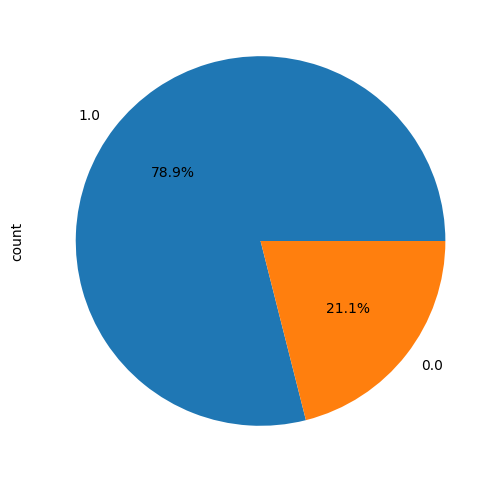

In [12]:
zoo['backbone'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6))

Replacing missing values in 'backbone' with most common value in column.

In [13]:
zoo = zoo.fillna(1)

C:\Users\wyszy\AppData\Local\Temp\ipykernel_3968\2043601148.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  zoo = zoo.fillna(1)


In [14]:
zoo.isnull().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

<Axes: >

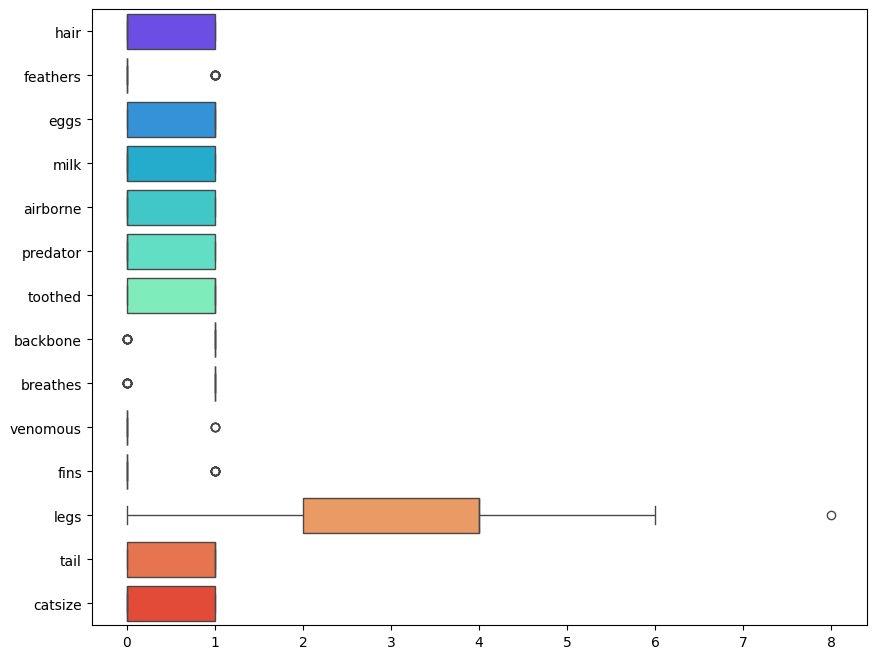

In [15]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(ax=ax, data=zoo.loc[:,zoo.columns != 'class_type'], orient='h', palette='rainbow')

No outliers - 8 legs is possible

Visualizations:

C:\Users\wyszy\AppData\Local\Temp\ipykernel_3968\1077189046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='class_type', y='count', data=class_counts, palette='rainbow')


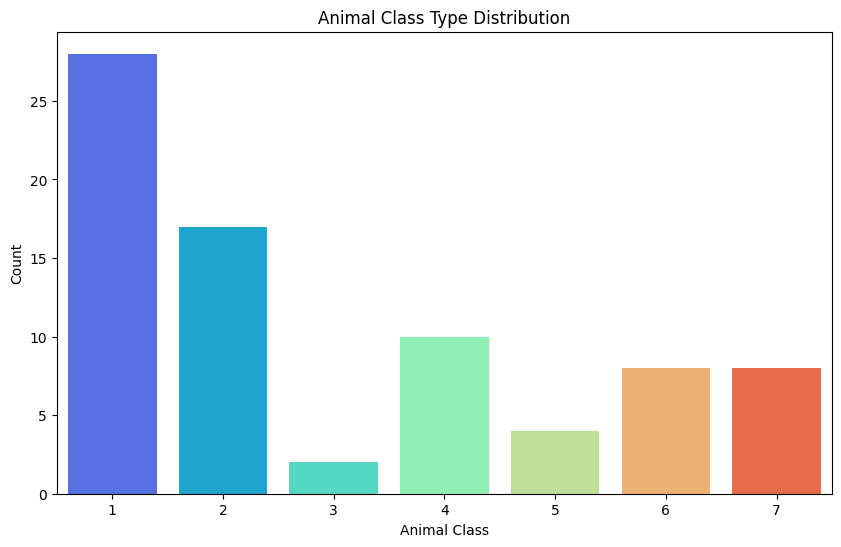

In [16]:
class_counts = zoo['class_type'].value_counts().reset_index()
class_counts.columns = ['class_type', 'count']


plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='class_type', y='count', data=class_counts, palette='rainbow')

plt.title("Animal Class Type Distribution")
plt.xlabel("Animal Class")
plt.ylabel("Count")

plt.show()

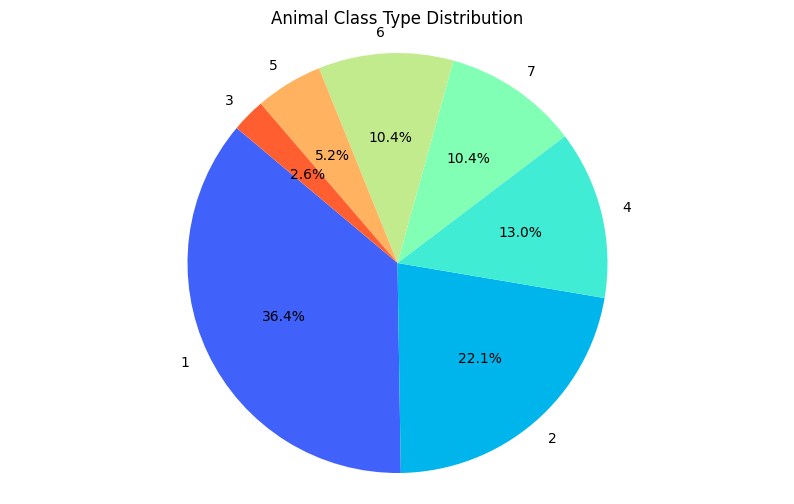

In [17]:
class_counts = zoo['class_type'].value_counts().reset_index()
class_counts.columns = ['class_type', 'count']

plt.figure(figsize=(10, 6))
colors = sns.color_palette('rainbow', len(class_counts))
plt.pie(class_counts['count'], labels=class_counts['class_type'], colors=colors, autopct='%1.1f%%', startangle=140)

plt.title("Animal Class Type Distribution")
plt.axis('equal') 

plt.show()

Changing to numeric values.

In [18]:
zoo = zoo.apply(pd.to_numeric, errors='coerce')
zoo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 2 to 100
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hair        77 non-null     int64  
 1   feathers    77 non-null     int64  
 2   eggs        77 non-null     int64  
 3   milk        77 non-null     int64  
 4   airborne    77 non-null     float64
 5   aquatic     71 non-null     float64
 6   predator    77 non-null     int64  
 7   toothed     77 non-null     int64  
 8   backbone    77 non-null     float64
 9   breathes    77 non-null     int64  
 10  venomous    77 non-null     int64  
 11  fins        77 non-null     float64
 12  legs        77 non-null     float64
 13  tail        77 non-null     int64  
 14  domestic    64 non-null     float64
 15  catsize     77 non-null     int64  
 16  class_type  77 non-null     int64  
dtypes: float64(6), int64(11)
memory usage: 10.8 KB


In [19]:
zoo.isnull().sum()

hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        6
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic      13
catsize        0
class_type     0
dtype: int64

<Axes: ylabel='count'>

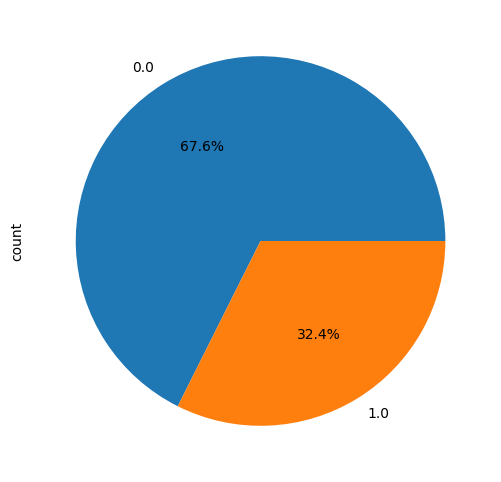

In [20]:
zoo['aquatic'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6))

<Axes: ylabel='count'>

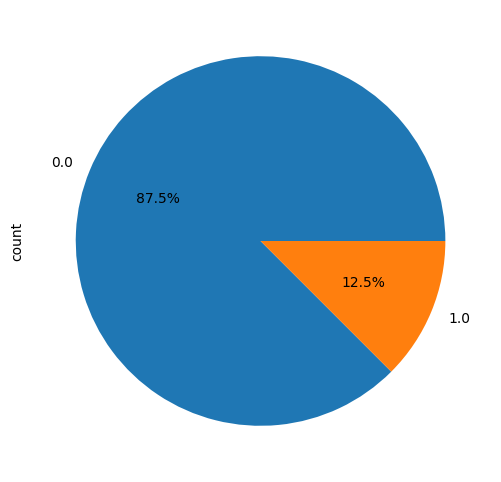

In [21]:
zoo['domestic'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6))

I am filling in the missing data with the most common values in both columns - in this case, 0.

In [22]:
zoo = zoo.fillna(0)

In [23]:
zoo.isnull().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

Correlation Matrix:
                hair  feathers      eggs      milk  airborne   aquatic  \
hair        1.000000 -0.436969 -0.865780  0.865780 -0.167483 -0.477899   
feathers   -0.436969  1.000000  0.402374 -0.402374  0.633694 -0.142154   
eggs       -0.865780  0.402374  1.000000 -1.000000  0.358569  0.375369   
milk        0.865780 -0.402374 -1.000000  1.000000 -0.358569 -0.375369   
airborne   -0.167483  0.633694  0.358569 -0.358569  1.000000 -0.287137   
aquatic    -0.477899 -0.142154  0.375369 -0.375369 -0.287137  1.000000   
predator   -0.185417 -0.122250  0.059028 -0.059028 -0.304550  0.412126   
toothed     0.516661 -0.598609 -0.672181  0.672181 -0.595469  0.123189   
backbone    0.060684  0.228709 -0.324799  0.324799 -0.203810  0.045720   
breathes    0.420433  0.272611 -0.387147  0.387147  0.323911 -0.644871   
venomous    0.046491 -0.124600  0.176950 -0.176950  0.111035  0.102953   
fins       -0.335140 -0.217307  0.231455 -0.231455 -0.258199  0.544454   
legs        0.3646

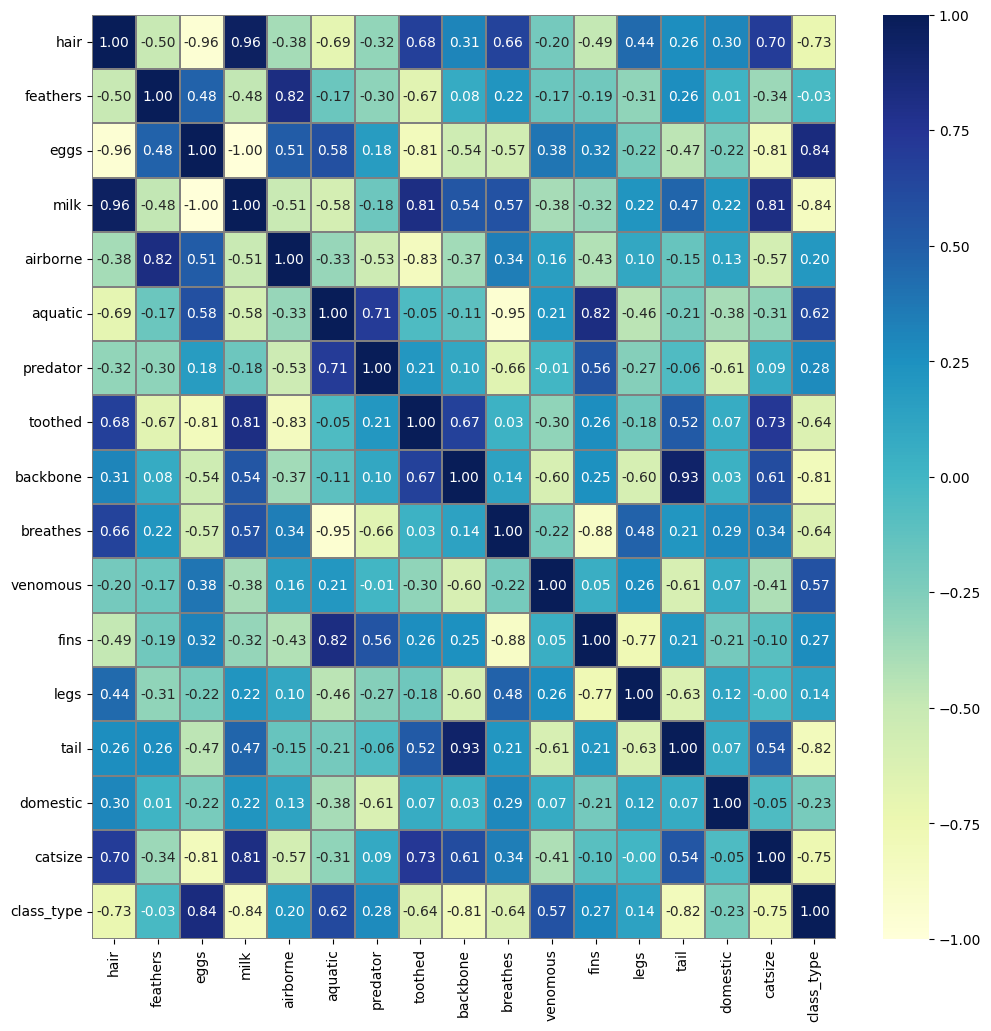

In [24]:
correlation_matrix = zoo.corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix.corr(), annot=True,fmt=".2f" ,linewidths=0.3, linecolor="grey",cmap='YlGnBu')
plt.show()

There are columns with strong correlation, but since there is not much data, I am not opting for PCA.

In [25]:
X = zoo.drop('class_type', axis=1) 
y = zoo['class_type']

In [26]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
2,0,0,1,0,0.0,1.0,1,1,1.0,0,0,1.0,0.0,1,0.0,0
3,1,0,0,1,0.0,0.0,1,1,1.0,1,0,0.0,4.0,0,0.0,1
5,1,0,0,1,0.0,0.0,0,1,1.0,1,0,0.0,4.0,1,0.0,1
6,1,0,0,1,0.0,0.0,0,1,1.0,1,0,0.0,4.0,1,1.0,1
7,0,0,1,0,0.0,1.0,0,1,1.0,0,0,1.0,0.0,1,1.0,0


### I. Clustering

### K-means 

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=7, random_state=42)

In [29]:
labels = kmeans.labels_
silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.351


In [30]:
zoo['cluster_kmeans'] = kmeans.labels_

Visualizations:

In [31]:
pca_plot = PCA(n_components=2)
X_pca_plot = pca_plot.fit_transform(X_scaled)

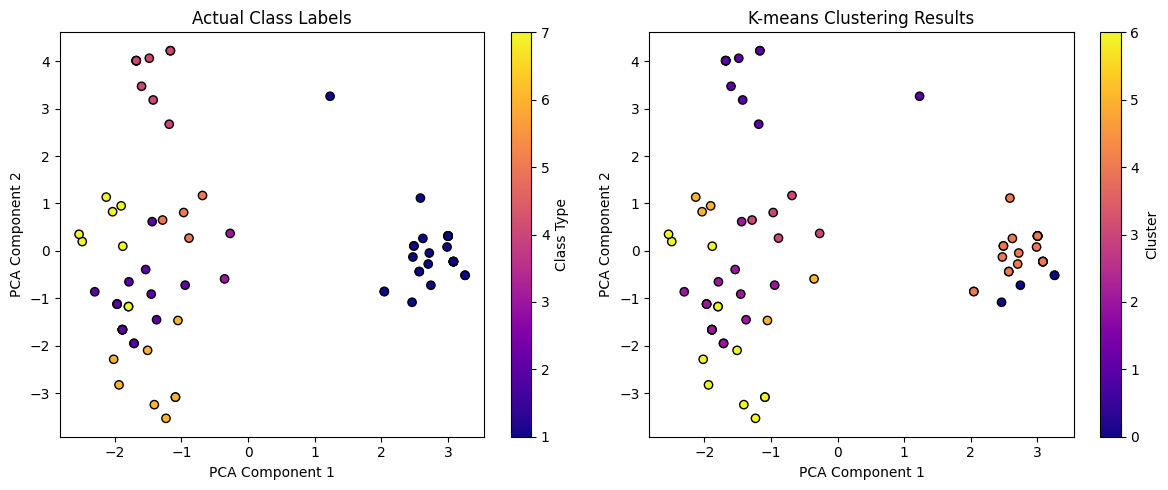

In [32]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca_plot[:, 0], X_pca_plot[:, 1], c=y, cmap='plasma', edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Actual Class Labels')
plt.colorbar(label='Class Type')

plt.subplot(1, 2, 2)
plt.scatter(X_pca_plot[:, 0], X_pca_plot[:, 1], c=zoo['cluster_kmeans'], cmap='plasma', edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering Results')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

In [33]:
cluster_counts = zoo['cluster_kmeans'].value_counts().sort_index()
print("Number of data points in each cluster:")
print(cluster_counts)

Number of data points in each cluster:
cluster_kmeans
0     4
1    11
2    17
3     5
4    23
5     5
6    12
Name: count, dtype: int64


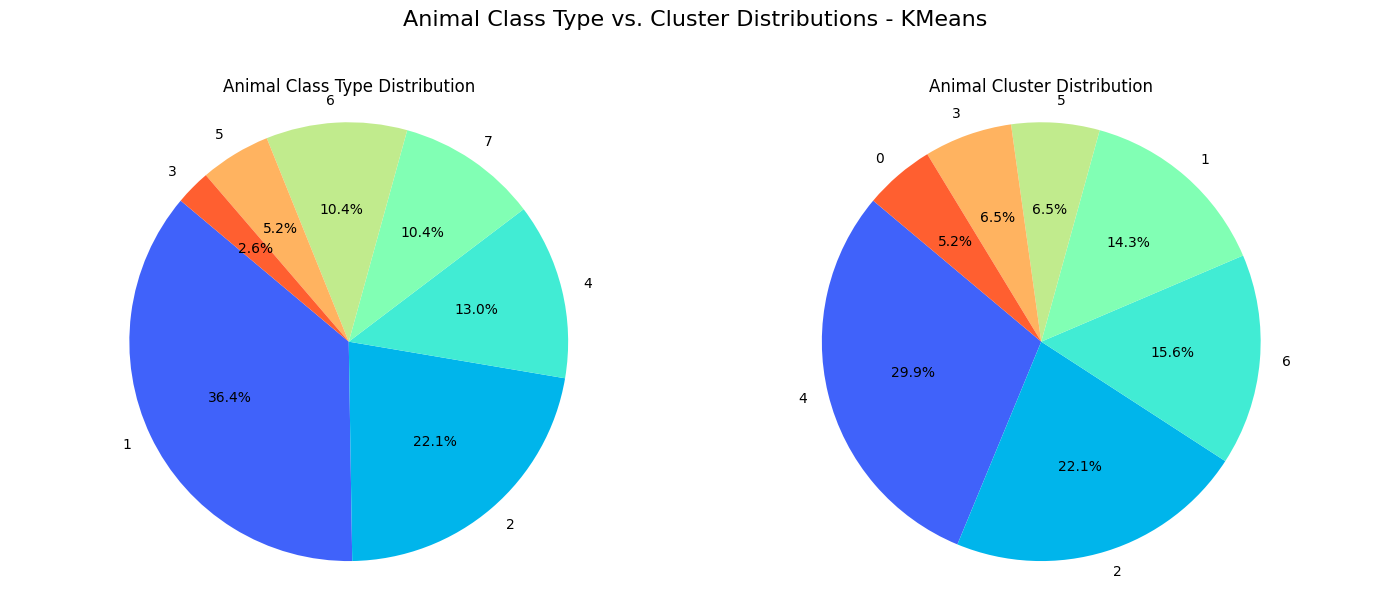

In [34]:
class_counts = zoo['class_type'].value_counts().reset_index()
class_counts.columns = ['class_type', 'count']

cluster_counts = zoo['cluster_kmeans'].value_counts().reset_index()
cluster_counts.columns = ['cluster_kmeans', 'count']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

colors_class = sns.color_palette('rainbow', len(class_counts))
ax1.pie(class_counts['count'], labels=class_counts['class_type'], colors=colors_class, autopct='%1.1f%%', startangle=140)
ax1.set_title("Animal Class Type Distribution")
ax1.axis('equal')

colors_cluster = sns.color_palette('rainbow', len(cluster_counts))
ax2.pie(cluster_counts['count'], labels=cluster_counts['cluster_kmeans'], colors=colors_cluster, autopct='%1.1f%%', startangle=140)
ax2.set_title("Animal Cluster Distribution")
ax2.axis('equal')

fig.suptitle("Animal Class Type vs. Cluster Distributions - KMeans", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

The created clusters have a distribution similar to the actual classes, with the proportions more or less preserved.

In [35]:
filtered_rows = zoo[zoo['cluster_kmeans'] == 4][['cluster_kmeans', 'class_type']]
print(filtered_rows)

    cluster_kmeans  class_type
3                4           1
5                4           1
10               4           1
17               4           1
22               4           1
27               4           1
28               4           1
29               4           1
32               4           1
36               4           1
44               4           1
45               4           1
47               4           1
48               4           1
49               4           1
50               4           1
54               4           1
55               4           1
84               4           1
93               4           1
94               4           1
96               4           1
98               4           1


In [36]:
count_class_type_1 = zoo[zoo['class_type'] == 1].shape[0]
count_cluster_4 = zoo[zoo['cluster_kmeans'] == 4].shape[0]

print(f"Number of rows where class_type equals 1: {count_class_type_1}")
print(f"Number of rows where cluster_kmeans equals 4: {count_cluster_4 }")

Number of rows where class_type equals 1: 28
Number of rows where cluster_kmeans equals 4: 23


In one cluster, there are indeed values with the same class_type, although a few are missing.

In [37]:
filtered_rows = zoo[zoo['cluster_kmeans'] == 6][['cluster_kmeans', 'class_type']]
print(filtered_rows)

    cluster_kmeans  class_type
30               6           6
39               6           6
40               6           6
42               6           6
46               6           7
51               6           6
53               6           7
81               6           7
85               6           7
88               6           6
97               6           6
99               6           7


In [38]:
count_class_type_6 = zoo[zoo['class_type'] == 6].shape[0]
count_cluster_6 = zoo[zoo['cluster_kmeans'] == 6].shape[0]

print(f"Number of rows where class_type equals 6: {count_class_type_6}")
print(f"Number of rows where cluster_kmeans equals 6: {count_cluster_6}")

Number of rows where class_type equals 6: 8
Number of rows where cluster_kmeans equals 6: 12


Here, for example, class_type 6 and 7 have been mixed.

### Agglomerative Clustering

In [39]:
agglom = AgglomerativeClustering(n_clusters=7)
y_pred = agglom.fit_predict(X_scaled)

In [40]:
linkage_options = ['ward', 'complete', 'average', 'single']
best_score = -1
best_params = {}

for linkage in linkage_options:
        
            agglom = AgglomerativeClustering(n_clusters=7, linkage=linkage)
            labels = agglom.fit_predict(X)
            score = silhouette_score(X_scaled, labels)
            if score > best_score:
                best_score = score
                best_params = {'linkage': linkage}

print("Best parameters found: ", best_params)
print(f'Best silhouette score: {best_score:.3f}')

Best parameters found:  {'linkage': 'complete'}
Best silhouette score: 0.357


In [41]:
agglom = AgglomerativeClustering(n_clusters=7, linkage='complete')
y_pred = agglom.fit_predict(X_scaled)

Visualizations:

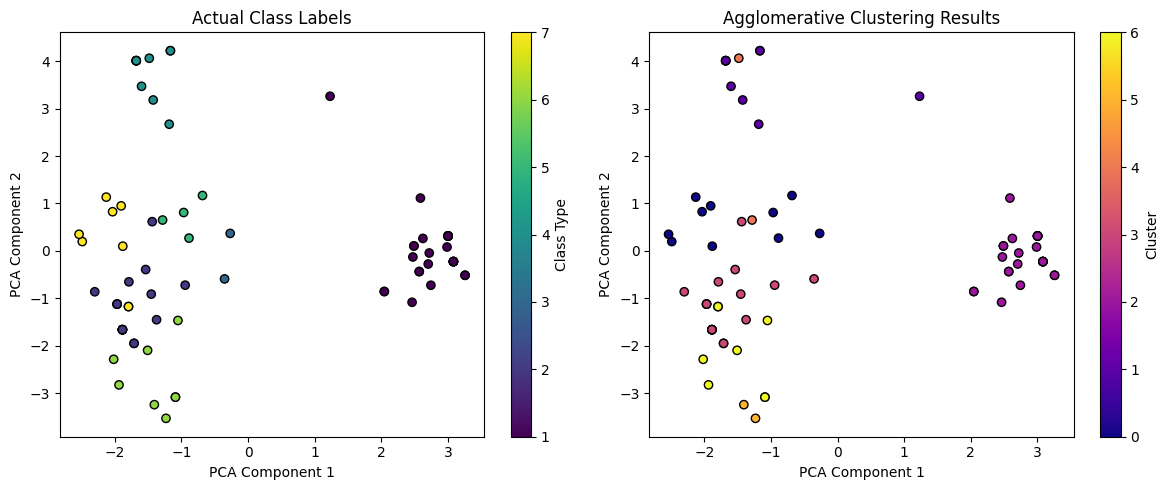

In [42]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Actual Class Labels')
plt.colorbar(label='Class Type')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='plasma', edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Agglomerative Clustering Results')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

In [43]:
zoo['cluster_agglom'] = agglom.labels_

In [44]:
cluster_counts_agglom = zoo['cluster_agglom'].value_counts().sort_index()
print("Number of data points in each cluster:")
print(cluster_counts_agglom)

Number of data points in each cluster:
cluster_agglom
0    10
1    10
2    27
3    18
4     2
5     2
6     8
Name: count, dtype: int64


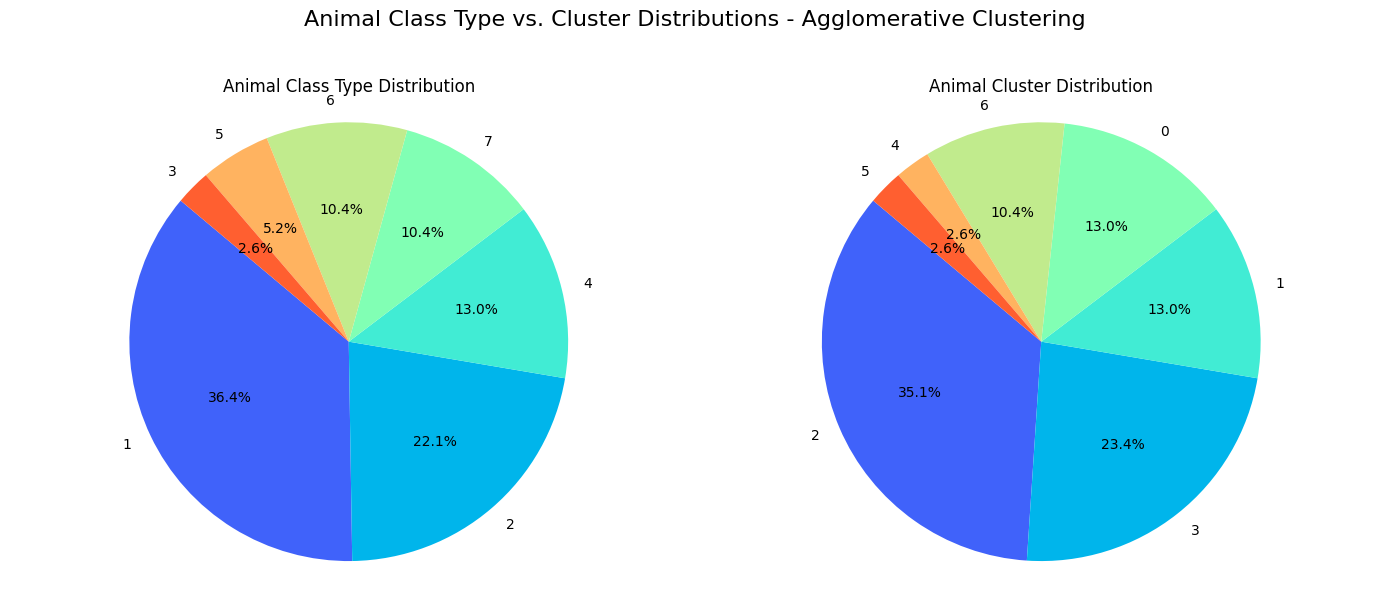

In [45]:
class_counts = zoo['class_type'].value_counts().reset_index()
class_counts.columns = ['class_type', 'count']

cluster_counts = zoo['cluster_agglom'].value_counts().reset_index()
cluster_counts.columns = ['cluster_agglom', 'count']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

colors_class = sns.color_palette('rainbow', len(class_counts))
ax1.pie(class_counts['count'], labels=class_counts['class_type'], colors=colors_class, autopct='%1.1f%%', startangle=140)
ax1.set_title("Animal Class Type Distribution")
ax1.axis('equal')

colors_cluster = sns.color_palette('rainbow', len(cluster_counts))
ax2.pie(cluster_counts['count'], labels=cluster_counts['cluster_agglom'], colors=colors_cluster, autopct='%1.1f%%', startangle=140)
ax2.set_title("Animal Cluster Distribution")
ax2.axis('equal')

fig.suptitle("Animal Class Type vs. Cluster Distributions - Agglomerative Clustering", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

Here, the clusters seem to be more aligned with the actual distribution of classes.

In [46]:
filtered_rows = zoo[zoo['cluster_agglom'] == 2][['cluster_agglom', 'class_type']]
print(filtered_rows)

    cluster_agglom  class_type
3                2           1
5                2           1
6                2           1
9                2           1
10               2           1
17               2           1
22               2           1
27               2           1
28               2           1
29               2           1
31               2           1
32               2           1
35               2           1
36               2           1
44               2           1
45               2           1
47               2           1
48               2           1
49               2           1
50               2           1
54               2           1
55               2           1
84               2           1
93               2           1
94               2           1
96               2           1
98               2           1


In [47]:
count_class_type_1 = zoo[zoo['class_type'] == 1].shape[0]
count_cluster_2 = zoo[zoo['cluster_agglom'] == 2].shape[0]

print(f"Number of rows where class_type equals 1: {count_class_type_1}")
print(f"Number of rows where cluster_agglom equals 2: {count_cluster_2}")

Number of rows where class_type equals 1: 28
Number of rows where cluster_agglom equals 2: 27


This model almost perfectly created a cluster of animals with class_type 1.

In [48]:
filtered_rows = zoo[zoo['cluster_agglom'] == 1][['cluster_agglom', 'class_type']]
print(filtered_rows)

    cluster_agglom  class_type
2                1           4
7                1           4
8                1           4
12               1           4
18               1           4
19               1           1
34               1           4
38               1           4
82               1           4
92               1           4


In [49]:
count_class_type_4 = zoo[zoo['class_type'] == 4].shape[0]
count_cluster_1 = zoo[zoo['cluster_agglom'] == 1].shape[0]

print(f"Number of rows where class_type equals 4: {count_class_type_4}")
print(f"Number of rows where cluster_agglom equals 1: {count_cluster_1 }")

Number of rows where class_type equals 4: 10
Number of rows where cluster_agglom equals 1: 10


An almost perfect cluster of animals with class_type 4.

In [50]:
filtered_rows = zoo[zoo['cluster_agglom'] == 6][['cluster_agglom', 'class_type']]
print(filtered_rows)

    cluster_agglom  class_type
24               6           6
30               6           6
40               6           6
42               6           6
51               6           6
81               6           7
88               6           6
99               6           7


In [51]:
count_class_type_6 = zoo[zoo['class_type'] == 6].shape[0]
count_cluster_6 = zoo[zoo['cluster_agglom'] == 6].shape[0]

print(f"Number of rows where class_type equals 6: {count_class_type_6}")
print(f"Number of rows where cluster_agglom equals 6: {count_cluster_6}")

Number of rows where class_type equals 6: 8
Number of rows where cluster_agglom equals 6: 8


Here, classes 6 and 7 also ended up in the same cluster.

In general, Agglomerative Clustering seems to create clusters that are more aligned with the actual division of animals into classes, although the silhouette score of both models is nearly the same.

### II. Classification

DTC

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, stratify=y, random_state=42)

In [79]:
from sklearn.metrics import f1_score

dtc_clf = tree.DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16]
}

grid_search = GridSearchCV(estimator=dtc_clf, param_grid=param_grid, cv=5, scoring='f1_micro')
grid_search.fit(X_train, y_train)
best_dtc_clf = grid_search.best_estimator_
dtc_prediction = best_dtc_clf.predict(X_test)
print(best_dtc_clf)

c:\Users\wyszy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


DecisionTreeClassifier(max_depth=8, random_state=42)


In [54]:
values = [i for i in range(1, 15)]
train_scores, test_scores = list(), list()

In [55]:
for i in values:
    
    model = DecisionTreeClassifier(max_depth=i)
    
    model.fit(X_train, y_train)
 
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
   
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.590, test: 0.562
>2, train: 0.721, test: 0.688
>3, train: 0.820, test: 0.812
>4, train: 0.902, test: 0.875
>5, train: 0.951, test: 0.938
>6, train: 0.984, test: 0.938
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 0.938
>9, train: 1.000, test: 0.938
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 0.875
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000


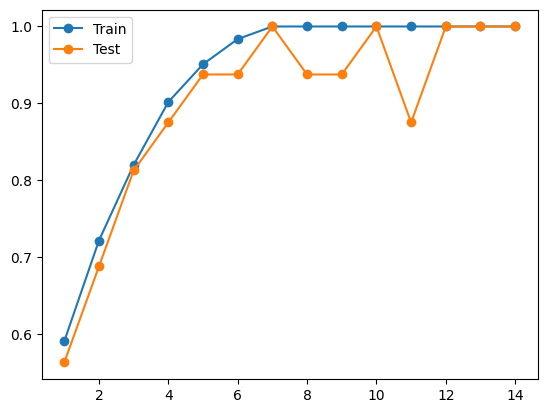

In [56]:
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [57]:
dtc_clf = tree.DecisionTreeClassifier(max_depth=8, random_state=42)
dtc_clf = dtc_clf.fit(X_train, y_train)
y_pred = dtc_clf.predict(X_test)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [59]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



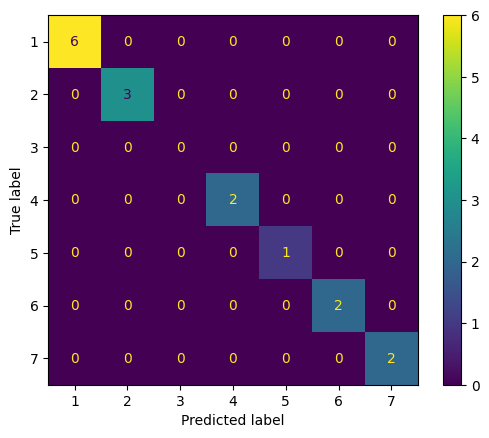

In [60]:
cm = confusion_matrix(y_test,y_pred, labels = dtc_clf.classes_ )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc_clf.classes_ )
disp.plot()

RFC

In [77]:
import time

start_time = time.time()

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='f1_micro')
grid_search.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best max_depth: {best_params['max_depth']}")
print(f"Elapsed time: {elapsed_time:.2f} seconds")

Best max_depth: 4
Elapsed time: 3.21 seconds


In [62]:
values = [i for i in range(1, 15)]
train_scores, test_scores = list(), list()

In [63]:
for i in values:
    
    model = RandomForestClassifier(n_estimators=200, max_depth=i)
    
    model.fit(X_train, y_train)
 
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
   
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.721, test: 0.688
>2, train: 0.902, test: 0.875
>3, train: 0.967, test: 1.000
>4, train: 1.000, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000


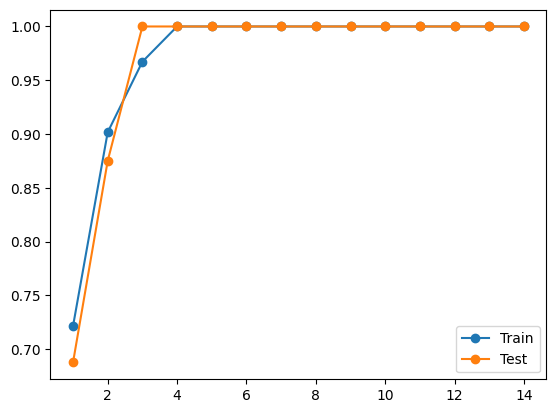

In [64]:
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [65]:
rfc = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [66]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [67]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



KNN

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15]
}

pipeline = Pipeline([ 
    ('knn', KNeighborsClassifier())
])


grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=2, scoring='f1_micro')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best parameters: {best_params}")

Best parameters: {'knn__n_neighbors': 3}


In [70]:
values = [i for i in range(1, 50)]
train_scores, test_scores = list(), list()

In [71]:
for i in values:
  
    model = KNeighborsClassifier(n_neighbors=i)
   
    model.fit(X_train_scaled, y_train)
   
    train_yhat = model.predict(X_train_scaled)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
  
    test_yhat = model.predict(X_test_scaled)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
   
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 1.000, test: 0.938
>2, train: 0.934, test: 0.875
>3, train: 0.934, test: 0.875
>4, train: 0.967, test: 0.875
>5, train: 0.951, test: 0.875
>6, train: 0.951, test: 0.875
>7, train: 0.934, test: 0.875
>8, train: 0.934, test: 0.875
>9, train: 0.934, test: 0.812
>10, train: 0.934, test: 0.875
>11, train: 0.902, test: 0.812
>12, train: 0.902, test: 0.812
>13, train: 0.885, test: 0.812
>14, train: 0.885, test: 0.812
>15, train: 0.869, test: 0.812
>16, train: 0.869, test: 0.812
>17, train: 0.852, test: 0.812
>18, train: 0.836, test: 0.812
>19, train: 0.836, test: 0.750
>20, train: 0.836, test: 0.750
>21, train: 0.803, test: 0.688
>22, train: 0.787, test: 0.688
>23, train: 0.770, test: 0.688
>24, train: 0.754, test: 0.688
>25, train: 0.754, test: 0.688
>26, train: 0.721, test: 0.688
>27, train: 0.656, test: 0.562
>28, train: 0.639, test: 0.562
>29, train: 0.639, test: 0.562
>30, train: 0.607, test: 0.562
>31, train: 0.590, test: 0.562
>32, train: 0.590, test: 0.562
>33, train: 0.590

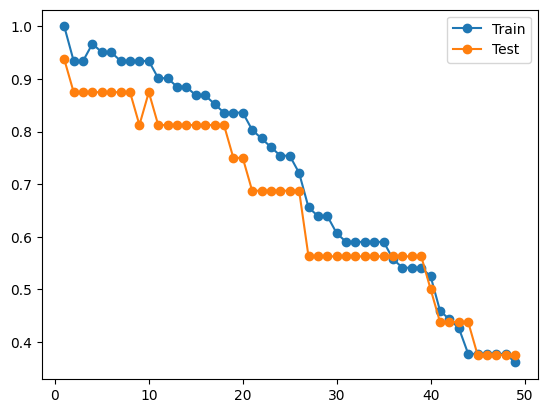

In [72]:
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [73]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [74]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88


In [75]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         3
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.50      0.67         2

    accuracy                           0.88        16
   macro avg       0.89      0.89      0.86        16
weighted avg       0.92      0.88      0.87        16



Among the classification models, KNN performed the worst.

### Project by: Martyna Wyszyńska